# Coding Challenge- Web Data Analysis

In [2]:
import pandas as pd

data = pd.read_csv('InternetCaseStudy.csv')

**1. Analyze each variable of the data collected through data summarization to get a basic understanding of the dataset and to prepare for further analysis.**

In [4]:
data.columns

Index(['Bounces', 'Exits', 'Continent', 'Sourcegroup', 'Timeinpage',
       'Uniquepageviews', 'Visits', 'BouncesNew'],
      dtype='object')

In [5]:
data.isnull().sum()

Bounces            0
Exits              0
Continent          0
Sourcegroup        0
Timeinpage         0
Uniquepageviews    0
Visits             0
BouncesNew         0
dtype: int64

In [6]:
print("\nUnique Values in Categorical Columns:\n")
categorical_columns = data.select_dtypes(include='object').columns
numerical_columns= data.select_dtypes(include='number').columns

numeric_data = data.select_dtypes(include=['number'])  # Selecting only numeric columns for future correlation analysis 
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

print("\n")

for col in numerical_columns:
    print(f"{col}: {data[col].unique()}")


Unique Values in Categorical Columns:

Continent: ['OC' 'N.America' 'AS' 'EU' 'SA' 'AF']
Sourcegroup: ['(direct)' 'Others' 'public.tableausoftware.com' 'visualisingdata.com'
 'google' 'tableausoftware.com' 't.co' 'facebook' 'reddit.com']


Bounces: [ 0  1  2  3  4  7 29 12  9 24  5  6  8 30]
Exits: [ 0  1  2  3  4 12  5  7 36  9 27  6 10 15  8 33]
Timeinpage: [  18    4   35 ... 1488 1376 1447]
Uniquepageviews: [ 1  2  3  4 14  6 10 45  5 13  9 27  7 11 15 20  8 35]
Visits: [ 0  1  2  3  4 14 10 45  5 13  9 27  6  7 11  8 35]
BouncesNew: [0.   0.01 0.02 0.03 0.04 0.07 0.29 0.12 0.09 0.24 0.05 0.06 0.08 0.3 ]


In [7]:
# all statistical data
data.describe()

,Bounces,Exits,Timeinpage,Uniquepageviews,Visits,BouncesNew
count,32109.000000,32109.000000,32109.000000,32109.000000,32109.000000,32109.000000
mean,0.713009,0.906039,73.184746,1.114329,0.906039,0.007130
std,0.708215,0.695819,394.441111,0.614880,0.730068,0.007082
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,0.010000
75%,1.000000,1.000000,10.000000,1.000000,1.000000,0.010000
max,30.000000,36.000000,46745.000000,45.000000,45.000000,0.300000


**2. As mentioned earlier, a unique page view represents the number of sessions during which that page was viewed one or more times. A visit counts all instances, no matter how many times the same visitor may have been to your site. So the team needs to know whether the unique page view value depends on visits.**

Correlation between Uniquepageviews and Visits: 0.8144457070735213




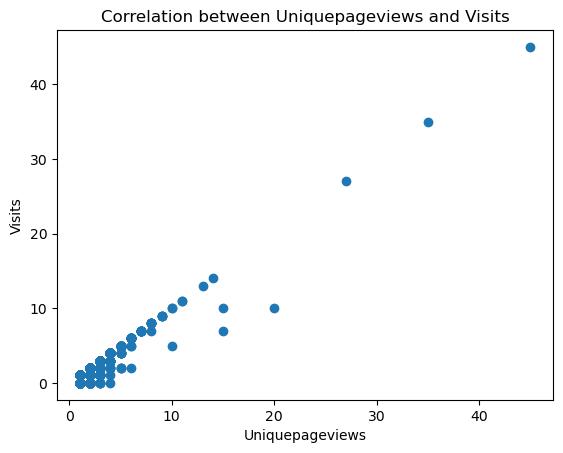

In [9]:
import matplotlib.pyplot as plt

# first Calculating correlation
correlation = data['Uniquepageviews'].corr(data['Visits'])
print("Correlation between Uniquepageviews and Visits:", correlation)
print("\n")

# Visualizing data through scatter plot chart
plt.scatter(data['Uniquepageviews'], data['Visits'])
plt.title('Correlation between Uniquepageviews and Visits')
plt.xlabel('Uniquepageviews')
plt.ylabel('Visits')
plt.show()



**3. Factors which could affect the Exits**

In [34]:
exit_factors = data[[ 'Timeinpage','Exits', 'Bounces', 'Visits', 'Uniquepageviews']].corr()
exits_correlation = exit_factors['Exits']
print(exits_correlation)


Timeinpage         0.001325
Exits              1.000000
Bounces            0.824912
Visits             0.800979
Uniquepageviews    0.791129
Name: Exits, dtype: float64


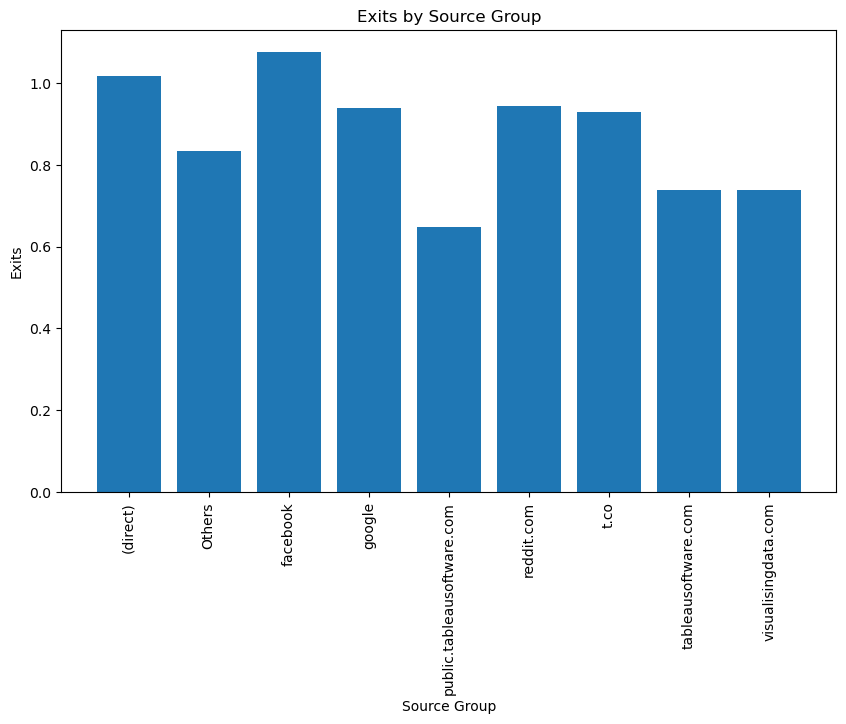

In [12]:
sourcegroup_exits = data.groupby('Sourcegroup')['Exits'].mean()
plt.figure(figsize=(10, 6))
plt.bar(sourcegroup_exits.index, sourcegroup_exits.values)
plt.title('Exits by Source Group')
plt.xlabel('Source Group')
plt.ylabel('Exits')
plt.xticks(rotation=90)
plt.show()

**4. Analyzing Factors Affecting Time on Page.**

In [14]:
time_in_page_correlations = numeric_data.corr()['Timeinpage'].sort_values(ascending=False)
print("Correlations with Time on Page:\n", time_in_page_correlations)


Correlations with Time on Page:
 Timeinpage         1.000000
Uniquepageviews    0.114593
Visits             0.066650
Exits              0.001325
Bounces           -0.109106
BouncesNew        -0.109106
Name: Timeinpage, dtype: float64


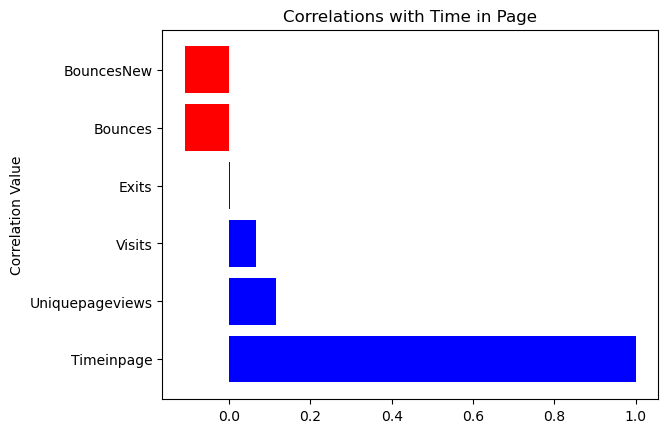

In [15]:
# Ploting Bar chart for time_on_page_correlations data

plt.barh(time_in_page_correlations.index, time_in_page_correlations.values, 
        color=['blue' if value >= 0 else 'red' for value in time_in_page_correlations.values])

plt.title('Correlations with Time in Page')
plt.ylabel('Correlation Value')

plt.show()

**5. Determining Factors impacting Bounce Rate**

In [17]:
# Calculate correlations
bounce_correlations = numeric_data.corr()['Bounces'].sort_values(ascending=False)
bounce_correlations


Bounces            1.000000
BouncesNew         1.000000
Exits              0.824912
Visits             0.819343
Uniquepageviews    0.659101
Timeinpage        -0.109106
Name: Bounces, dtype: float64

In [18]:
# Plotting graph

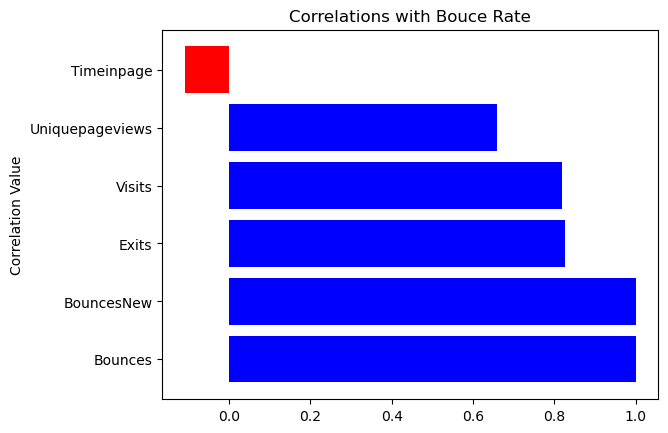

In [19]:
plt.barh(bounce_correlations.index, bounce_correlations.values, 
        color=['blue' if value >= 0 else 'red' for value in bounce_correlations.values])

plt.title('Correlations with Bouce Rate')
plt.ylabel('Correlation Value')

plt.show()